In [ ]:
#SIMPLE LINEAR REGRESSION

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

STEP:1 Read Data Set


In [2]:
import pandas as pd
df=pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Step:2 Perform Basic About Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [5]:
df.duplicated().sum()

0

Step:3 Separate X(RND) and Y(PROFIT)

In [6]:
x=df[['RND']]
y=df[['PROFIT']]

In [7]:
x.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [8]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

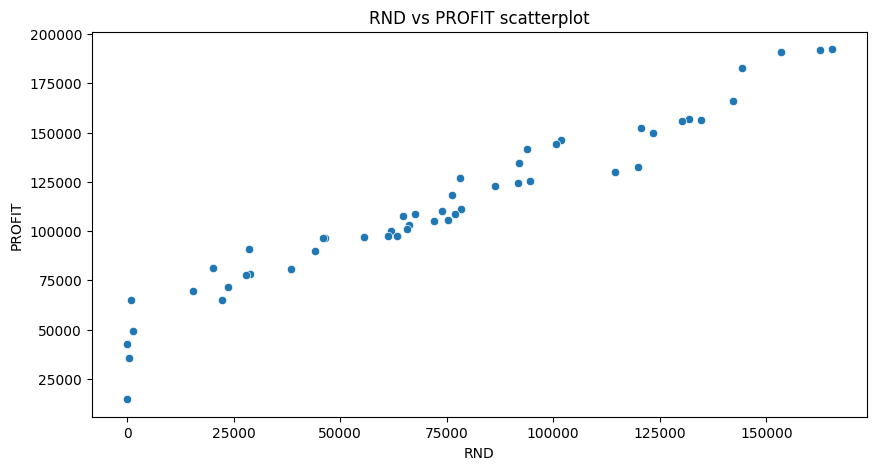

In [10]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='RND',y='PROFIT',data=df)
plt.title('RND vs PROFIT scatterplot')
plt.show()

Step:4 Build the Linear Regression Model

In [12]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [15]:
model.intercept_

array([49032.89914125])

In [16]:
model.coef_

array([[0.85429137]])

profit_pred=0.8542*RND+49032.90

Step:5 Evaluate the Model

In [13]:
#R2 score 
model.score(x,y)

0.9465353160804393

In [14]:
#Estimated values of profit
ypred=model.predict(x)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [18]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y,ypred)
print(f"Mean squared error(mse): {mse:.2f}")

Mean squared error(mse): 85120931.33


In [19]:
rmse=mse**(1/2)
print(f"Root mean squared error(rmse):{rmse:.2f}")

Root mean squared error(rmse):9226.10


In [21]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y,ypred)
print(f"Mean absolute error(mae):{mae:.2f}")

Mean absolute error(mae):6910.98


In [23]:
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y,ypred)
print(f'Mean absolute persentage error(mape): {mape*100:.2f}%')

Mean absolute persentage error(mape): 11.07%


In [24]:
from sklearn.metrics import r2_score
r2=r2_score(y,ypred)
print(f'R2 score:{r2:.4f}')

R2 score:0.9465


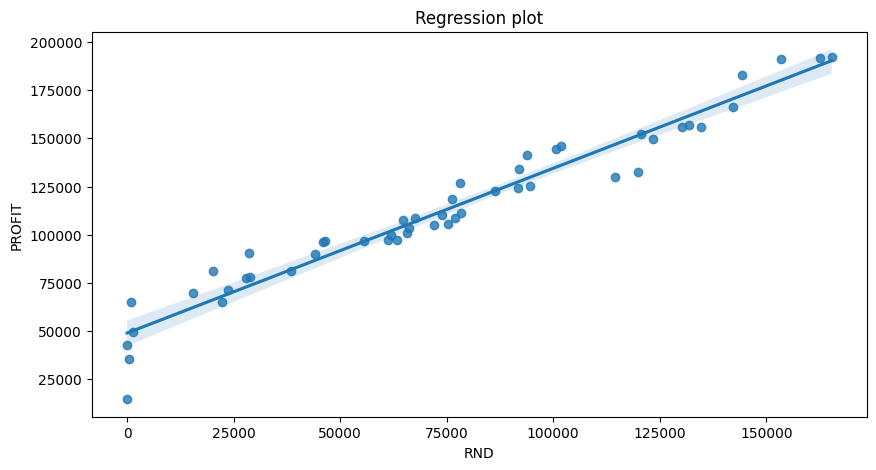

In [25]:
plt.figure(figsize=(10,5))
sns.regplot(data=df,x='RND',y='PROFIT')
plt.title('Regression plot')
plt.show()